In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df = pd.read_csv('/Users/nadanadia/Documents/GitHub/Learning/emails.csv', sep=";", nrows=10000)
df.shape

(10000, 6)

In [4]:
df.head(10)


,from,to,cc,subject,date,body
0,msagel@home.com,jarnold@enron.com,NaN,Status,"Thu, 16 Nov 2000 09:30:00 -0800 (PST)",John:\n?\nI'm not really sure what happened be...
1,slafontaine@globalp.com,john.arnold@enron.com,NaN,re:summer inverses,"Fri, 8 Dec 2000 05:05:00 -0800 (PST)",i suck-hope youve made more money in natgas la...
2,iceoperations@intcx.com,"icehelpdesk@intcx.com, internalmarketing@intcx...",NaN,The WTI Bullet swap contracts,"Tue, 15 May 2001 09:43:00 -0700 (PDT)","Hi,\n\n\n Following the e-mail you have rece..."
3,jeff.youngflesh@enron.com,"anthony.gilmore@enron.com, colleen.koenig@enro...",NaN,Invitation: EBS/GSS Meeting w/Bristol Babcock ...,"Mon, 27 Nov 2000 01:49:00 -0800 (PST)",Conference Room TBD. \n\nThis meeting will be...
4,caroline.abramo@enron.com,mike.grigsby@enron.com,john.arnold@enron.com,Harvard Mgmt,"Tue, 12 Dec 2000 09:33:00 -0800 (PST)",Mike- I have their trader coming into the offi...
5,klarnold@flash.net,john.arnold@enron.com,NaN,Fwd: NYTimes.com Article: Suspended Rabbi Quit...,"Mon, 11 Dec 2000 23:52:00 -0800 (PST)",>Sender: articles-email@ms1.lga2.nytimes.com\n...
6,outlook.team@enron.com,"aimee.shek@enron.com, albino.lopez@enron.com, ...",NaN,4-URGENT - OWA Please print this now.,"Fri, 11 May 2001 08:56:00 -0700 (PDT)",Current Notes User:\n\nREASONS FOR USING OUTLO...
7,jennifer.fraser@enron.com,"alex.mcleish@enron.com, sarah.mulholland@enron...",NaN,Fuel Switching,"Sun, 19 Nov 2000 09:34:00 -0800 (PST)",The attached report contains an analysis of fu...
8,caroline.abramo@enron.com,"john.arnold@enron.com, mike.maggi@enron.com","per.sekse@enron.com, russell.dyk@enron.com, ro...",Guggenheim Event,"Tue, 15 May 2001 03:28:00 -0700 (PDT)",John/Mike- Hi.. this is the list of people att...
9,soblander@carrfut.com,soblander@carrfut.com,NaN,daily charts and matrices as hot links 5/15,"Mon, 14 May 2001 23:59:00 -0700 (PDT)",The information contained herein is based on s...


### Check the Null in each columns

In [5]:
df.isnull().sum()

from          0
to          409
cc         8777
subject    1896
date          0
body          0
dtype: int64

In [6]:
df.isnull().sum() * 100 / len(df)

from        0.00
to          4.09
cc         87.77
subject    18.96
date        0.00
body        0.00
dtype: float64

### Duplicate rows

In [7]:
df.duplicated().sum()

4047

### Check only the email's body

In [8]:
body = df['body']
body

0       John:\n?\nI'm not really sure what happened be...
1       i suck-hope youve made more money in natgas la...
2        Hi,\n\n\n  Following the e-mail you have rece...
3       Conference Room TBD.  \n\nThis meeting will be...
4       Mike- I have their trader coming into the offi...
                              ...                        
9995    Carol St. Clair\nEB 3892\n713-853-3989 (Phone)...
9996    Morris:\nThanks for your input.  Harry Collins...
9997    John:\nI was reviewing an amendment that Susan...
9998    Carol St. Clair\nEB 3892\n713-853-3989 (Phone)...
9999    Shari:\nThe confirms desk has asked us to thin...
Name: body, Length: 10000, dtype: object

In [9]:
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt


In [10]:
data = body.values.tolist()
len(data)

10000

In [11]:
def words(sentences):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence), deacc=True)) #deacc =True removes punctuations

data_words = list(words(data))
print(data_words[3])

['conference', 'room', 'tbd', 'this', 'meeting', 'will', 'be', 'to', 'discuss', 'opportunity', 'for', 'ebs', 'to', 'provide', 'the', 'network', 'for', 'bbi', 'well', 'site', 'reporting', 'systems', 'to', 'send', 'their', 'data', 'across', 'maybe', 'vbn', 'ipnetconnect', 'application']


In [12]:
from gensim.models.phrases import Phrases, Phraser

# Automatically detect common phrases 

bigram = Phrases(data_words, min_count=5, threshold=100)
trigram = Phrases(bigram[data_words], threshold=100)

bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

print(trigram_mod[bigram_mod[data_words[200]]])


['yah', 'yah', 'this', 'technological', 'innovation', 'is', 'so', 'impersonal', 'original', 'message', 'from', 'arnold', 'john', 'sent', 'wednesday', 'november', 'am', 'to', 'abramo_caroline', 'subject', 're', 'efs', 'presentation', 'liked', 'my', 'drawing', 'better', 'original', 'message', 'from', 'abramo_caroline', 'sent', 'tuesday', 'november', 'am', 'to', 'doug_campbell', 'com', 'arturo', 'campbell', 'com', 'cc', 'arnold', 'john', 'subject', 'efs', 'presentation', 'doug', 'arturo', 'below', 'is', 'small', 'presentation', 'we', 'made', 'on', 'efs', 'with', 'the', 'flow', 'diagrams', 'john', 'drew', 'out', 'please', 'call', 'us', 'when', 'you', 'are', 'ready', 'to', 'discuss', 'kind', 'regards', 'caroline', 'file_efs_ppt']


In [13]:
#pip3 install -U pip setuptools wheel
#pip3 install -U spacy
#python3 -m spacy download en_core_web_sm

import spacy
import nltk
from nltk.corpus import stopwords

nlp = spacy.load("en_core_web_sm")
nltk.download('stopwords')

my_stopwords = stopwords.words('english')
my_stopwords.extend(['from', 'subject', 're', 'edu', 'use', 'ect', 'hou', 'com', 'recipient', 'sent', 'enron', 'cc', 'subject',
                                         'forwarded', 'corp', 'said', 'attached', 'ect',
                                         'recipient', 'email', 'original', 'doc', 'pm', 'mail', 'message', 'new',
                                         'enronxgate', 'na', 'year'])
    

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nadanadia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#my_stopwords = text.ENGLISH_STOP_WORDS.union(['ect', 'hou', 'com', 'recipient', 'sent', 'enron', 'cc', 'subject', 'forwarded', 'corp', 'said', 'attached', 'ect', 'recipient', 'email', 'original', 'doc', 'pm', 'mail', 'message', 'new', 'enronxgate', 'na', 'year'])

def remove_stopwords(texts):
    return[[word for word in simple_preprocess(str(doc)) if word not in my_stopwords] for doc in texts]

def make_bigrams(texts):
    return[bigram_mod[doc] for doc in texts]

def make_trigram(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
    

In [16]:

data_words_nostops = remove_stopwords(data_words)
data_words_bigrams = make_bigrams(data_words_nostops)

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV'])

In [17]:
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus =[id2word.doc2bow(text) for text in texts]

In [18]:
import gensim 
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=200, random_state=1, update_every=1, chunksize=100, passes=10, alpha='symmetric', per_word_topics=True, minimum_phi_value=0.3)

In [19]:
print(lda_model.print_topics())

[(149, '0.000*"meast" + 0.000*"nameless" + 0.000*"grey" + 0.000*"joseph_jkelly" + 0.000*"kglynn_powermerchant" + 0.000*"deutsche_bank" + 0.000*"sprecher" + 0.000*"rwolkwitz_powermerchant" + 0.000*"dbkgn_de" + 0.000*"powermerchant"'), (163, '0.000*"meast" + 0.000*"nameless" + 0.000*"grey" + 0.000*"joseph_jkelly" + 0.000*"kglynn_powermerchant" + 0.000*"deutsche_bank" + 0.000*"sprecher" + 0.000*"rwolkwitz_powermerchant" + 0.000*"dbkgn_de" + 0.000*"powermerchant"'), (27, '0.458*"month" + 0.286*"swap" + 0.123*"monthly" + 0.032*"summarize" + 0.023*"follow" + 0.006*"time" + 0.003*"nearby" + 0.001*"admin" + 0.001*"crack" + 0.000*"legge"'), (178, '0.799*"change" + 0.051*"refer" + 0.030*"benefit" + 0.023*"anytime" + 0.018*"different" + 0.012*"dial" + 0.007*"reservation" + 0.005*"participant" + 0.001*"jennifer_medcalf" + 0.001*"passcode"'), (0, '0.000*"meast" + 0.000*"nameless" + 0.000*"grey" + 0.000*"joseph_jkelly" + 0.000*"kglynn_powermerchant" + 0.000*"deutsche_bank" + 0.000*"sprecher" + 0.000

In [20]:
len(lda_model.show_topics())

10

In [21]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.33859093591897105


In [22]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))


Perplexity:  -52.77970088043893


In [ ]:
#import pyLDAvis.gensim_models as gensimvis
#import importlib

#pyLDAvis.enable_notebook
#visual = gensimvis.prepare(lda_model, corpus, id2word)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documenta

In [23]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

/var/folders/pj/hcl8501x21q4tkl5zdlc_mh80000gn/T/ipykernel_10814/1000666203.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/pj/hcl8501x21q4tkl5zdlc_mh80000gn/T/ipykernel_10814/1000666203.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,187.0,0.1991,"default, result, definition, occur, increase, ...","[really, sure, happen, impression, visit, ente..."
1,1,37.0,0.5260,"get, play, weather, curve, money, suggest, cas...","[suck_hope, make, money, natga, last, week, ge..."
2,2,27.0,0.2765,"month, swap, monthly, summarize, follow, time,...","[follow, receive, yesterday, concern, wti_bull..."
3,3,17.0,0.1669,"send, couple, ebs, thank, tbd, arnold, joseph_...","[conference, room, tbd, meeting, discuss, oppo..."
4,4,135.0,0.2854,"trade, trading, physical, commodity, financial...","[come, tomorrow, macro, fund, manage, trade, c..."
5,5,91.0,0.2786,"amendment, impact, responsibility, paragraph, ...","[sender, article, nytime, reply, klarnold_flas..."
6,6,62.0,0.5215,"able, access, enter, user, outlook, client, ma...","[current, note, user, reason, use, mailbox, mi..."
7,7,171.0,0.4726,"form, datum, cost, analysis, contain, ferc, te...","[report, contain, analysis, fuel_switching, ca..."
8,8,162.0,0.3504,"plan, start, night, go, last, come, ticket, pe...","[list, people, attend, night, event, start, li..."
9,9,75.0,0.6140,"energy, research, chart, contact, crude, publi...","[information, contained_herein, base, source, ..."


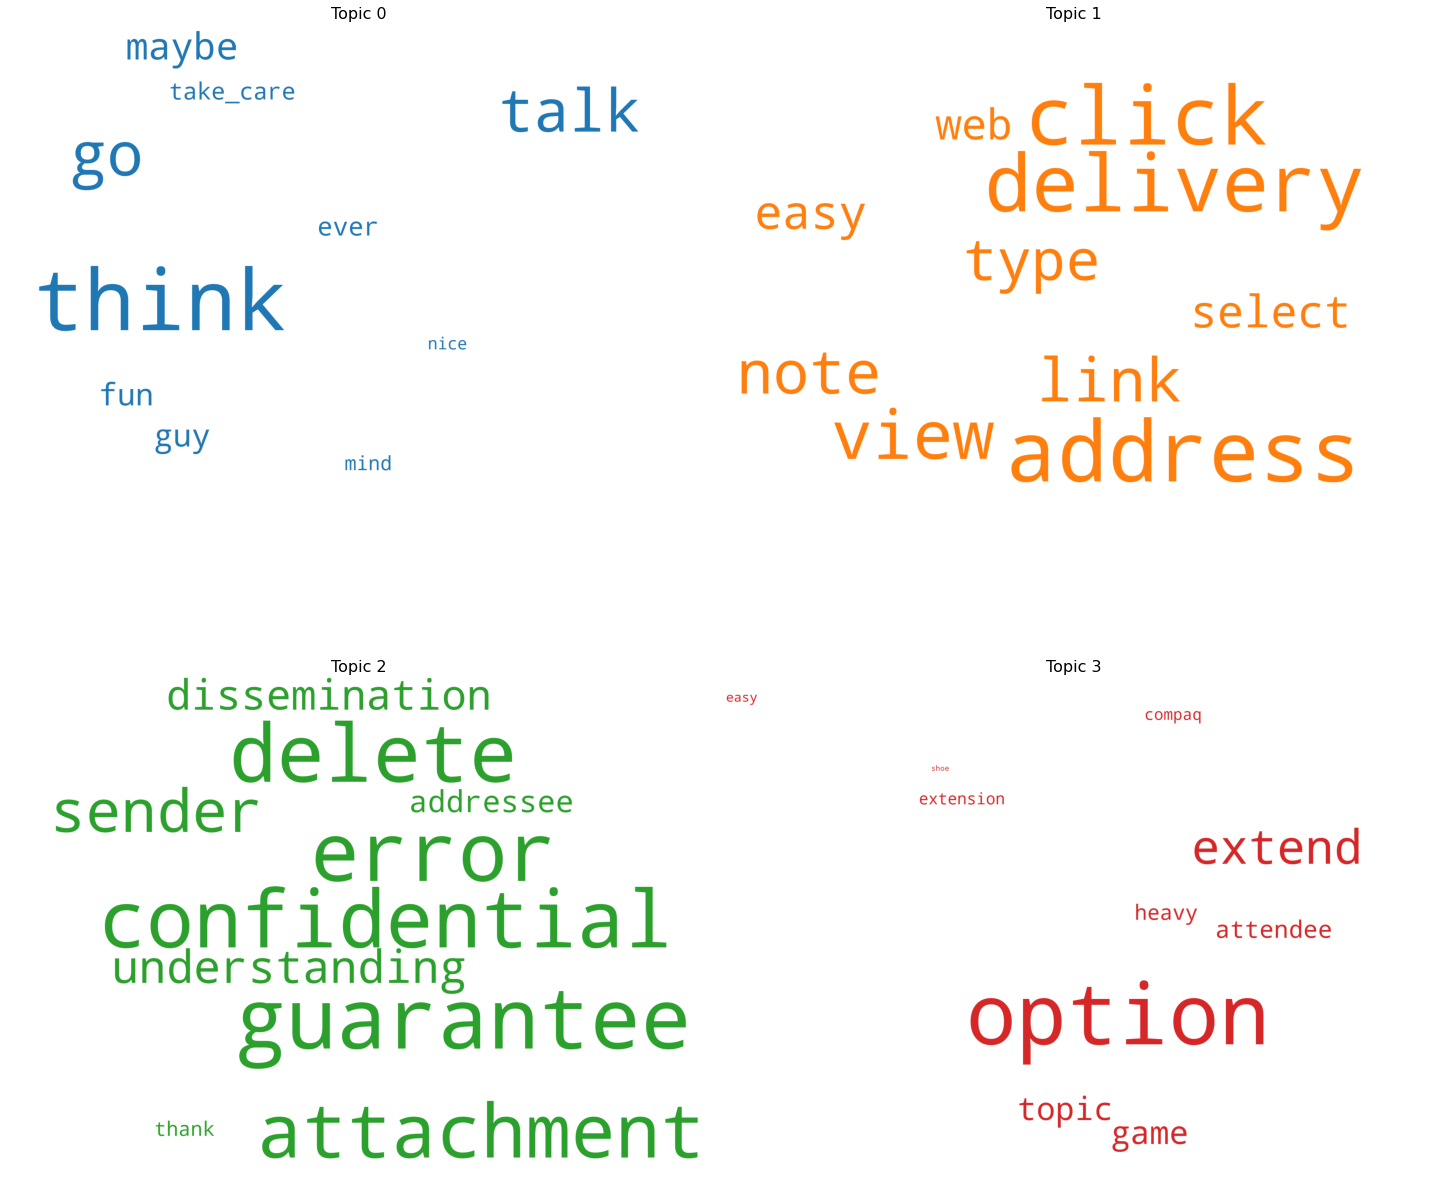

In [24]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=my_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()